# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss,BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split

In [3]:

uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)
neg = 6
pos = 9
datax,datay = ut.get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = ut.get_usps([neg,pos],alltestx,alltesty)


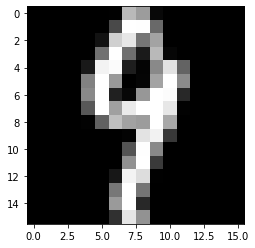

In [5]:
ut.show_usps(datax[datay==9][0])

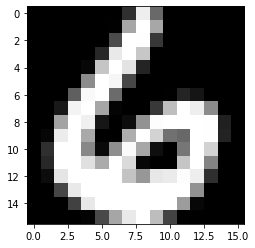

In [6]:
ut.show_usps(datax[datay==6][0])

In [7]:
datay.reshape(1,1308).shape

(1, 1308)

In [8]:
datax.shape

(1308, 256)

## Entraitenement : 

In [9]:
# Convertir en -1 ET 1  
datay_adapted = np.where(datay==6,0,1)
print("Classe 9 :",len(datay_adapted[datay_adapted==1]))
print("Classe 6 :",len(datay_adapted[datay_adapted==0]))

Classe 9 : 644
Classe 6 : 664


In [24]:
# Fonction de coût 
loss = MSELoss()

# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])



In [25]:

optimiser = Optim(encodeur , loss , eps = eps)
losses = optimiser.SGD(datax , datax , batch_size , epochs)




In [27]:
print(losses)


[112.2374240720395, 85.56130249027633, 78.73497855073944, 75.17948583266427, 72.8928762755149, 71.74781312081217, 70.86680233727903, 70.07677092719557, 69.41080283989147, 68.82209564111618, 68.3671353825218, 67.63865455693853, 66.84892896218449, 66.46482835842215, 66.40284710210076, 65.82115612725403, 65.47492133251684, 65.1422492217611, 64.72654409418713, 64.45495562324628, 63.98686579270864, 63.99345602216254, 63.64505876172011, 63.37903667607134, 63.318665420549166, 62.79508307792296, 62.53875515482262, 62.32989073110143, 62.17791407911579, 62.023678066334014, 61.72827845824134, 61.74509114797891, 61.3136493969468, 61.27474515188028, 61.079731975618074, 60.72267103495347, 61.1080391115371, 60.58678223418365, 60.40013161293665, 60.168752323692715, 60.39817812789476, 59.955051450449666, 60.02904539291894, 59.8922723912844, 59.67530103026294, 59.6432353669503, 59.70531697961938, 59.471101582589064, 59.44984839314128, 59.29081475567365, 59.04575190393882, 58.92315414778312, 59.142244505

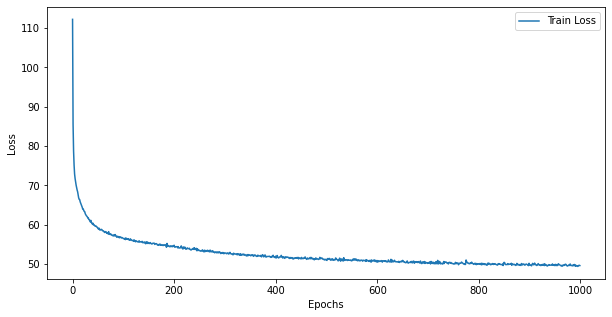

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

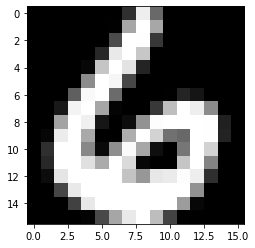

In [28]:
ut.show_usps(datax[:10][0])

In [29]:
resultat_train = optimiser._net.forward(datax)

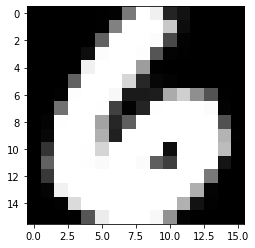

In [30]:
ut.show_usps(resultat_train[:10][0])

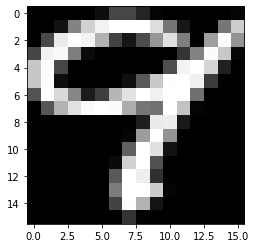

In [31]:

ut.show_usps(datax[datay_adapted==1][199])


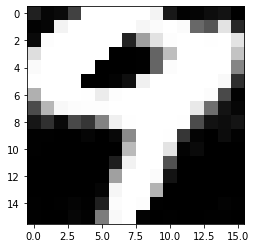

In [32]:
#Prediction sur l'ensemble de train :
ut.show_usps(resultat_train[datay_adapted==1][199])

### TEST SUR LE TEST :

In [33]:
resulta_test = optimiser._net.forward(testx)

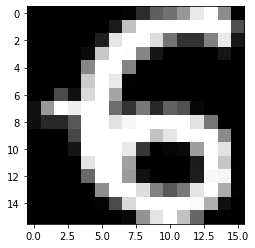

In [34]:
ut.show_usps(testx[19])

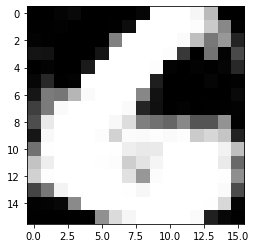

In [35]:
ut.show_usps(resulta_test[19])


## BCE : 

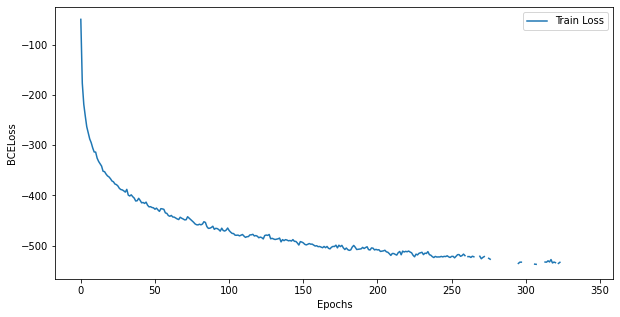

In [15]:
# Fonction de coût 
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


optimiser = Optim(encodeur , loss_bce , eps = eps)
lossesbce = optimiser.SGD(datax , datax , batch_size , epochs)


plt.figure(figsize=(10, 5))
plt.plot(lossesbce, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

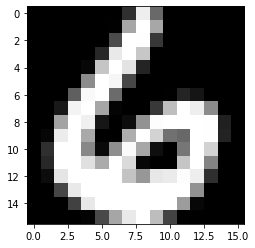

In [16]:
ut.show_usps(datax[0])

In [17]:
resultat_train = optimiser._net.forward(datax)

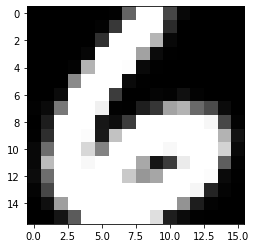

In [18]:
ut.show_usps(resultat_train[0])

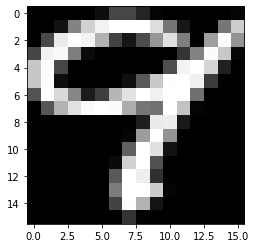

In [19]:

ut.show_usps(datax[datay_adapted==1][199])


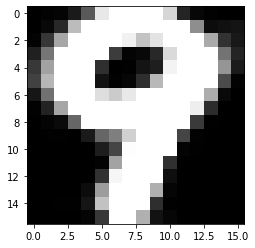

In [20]:
#Prediction sur l'ensemble de train :
ut.show_usps(resultat_train[datay_adapted==1][199])

### TEST SUR LE TEST :

In [21]:
resulta_test = optimiser._net.forward(testx)

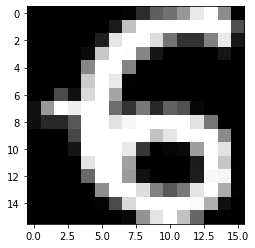

In [22]:
ut.show_usps(testx[19])

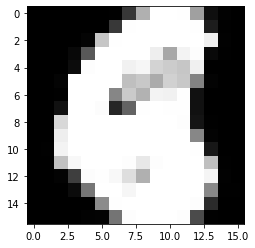

In [23]:
ut.show_usps(resulta_test[19])


## Clustering : 

In [39]:

#For standardising the dat
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, v_measure_score

import seaborn as sns

%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(datax)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4,random_state=0)
km = kmeans.fit(datax)

In [44]:
y_pred = kmeans.labels_

# Calcul des différentes métriques
ari = adjusted_rand_score(datay_adapted, y_pred)
ami = adjusted_mutual_info_score(datay_adapted, y_pred)
completeness = completeness_score(datay_adapted, y_pred)
homogeneity = homogeneity_score(datay_adapted, y_pred)
v_measure = v_measure_score(datay_adapted, y_pred)

# Affichage des résultats
print("Adjusted Rand Index:", ari)
print("Adjusted Mutual Information:", ami)
print("Completeness Score:", completeness)
print("Homogeneity Score:", homogeneity)
print("V-measure Score:", v_measure)

Adjusted Rand Index: 0.9696295326700607
Adjusted Mutual Information: 0.9352115984083377
Completeness Score: 0.9352473755850605
Homogeneity Score: 0.9352473755850605
V-measure Score: 0.9352473755850605


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


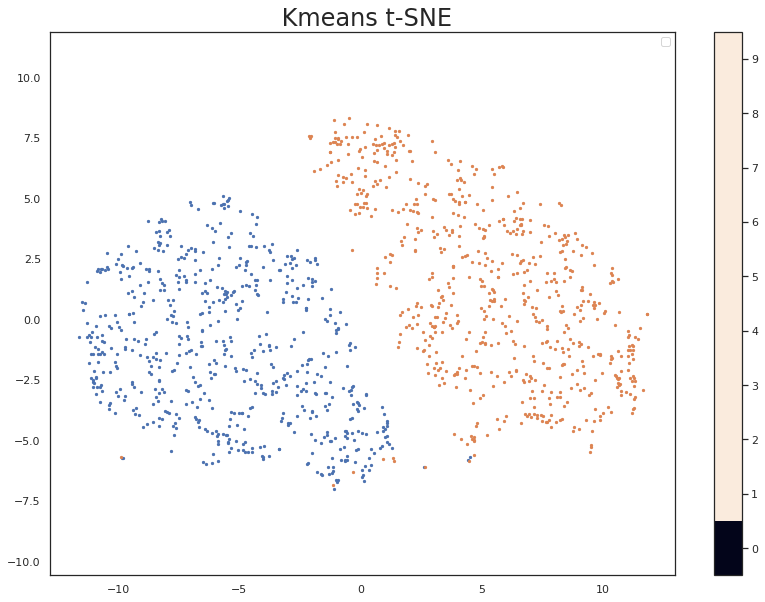

In [47]:
u_labels = np.unique(km.labels_)
 
#plotting the results:
 
for i in u_labels:
    mask=km.labels_==i
    plt.scatter(tsne[mask][:, 0] , tsne[mask][:, 1]  ,s= 5,cmap='Spectral')
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title(' Kmeans t-SNE', fontsize=24)
plt.show()

In [43]:
datay_adapted

array([0, 0, 0, ..., 1, 1, 1])